In [65]:
import os
import numpy
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.utils import to_categorical

In [66]:
## 訓練、測試資料集位置
TRAIN_IMAGES_ROOT_PATH = "mnist_png/training/"
TEST_IMAGES_ROOT_PATH = "mnist_png/testing/"

In [67]:
## 全部類別
all_classes = os.listdir(TRAIN_IMAGES_ROOT_PATH)
all_classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [68]:
train_images = []
train_labels = []
test_images = []

In [69]:
## 讀取所有類別的圖片
for classes in all_classes:
    train_images_name_array = os.listdir(TRAIN_IMAGES_ROOT_PATH+classes) ##取得在訓練資料中,每個類別裡的圖片
    print("正在讀取類別"+classes+"的圖片")
    for image_name in train_images_name_array:
        image_path = TRAIN_IMAGES_ROOT_PATH+classes+"/"+image_name 
        image = load_img(image_path,target_size=(28,28,3)) ## 讀取圖片
        image = img_to_array(image) ## 圖片轉換成像素點Array
        train_images.append(image)
        train_labels.append(classes)

正在讀取類別0的圖片
正在讀取類別1的圖片
正在讀取類別2的圖片
正在讀取類別3的圖片
正在讀取類別4的圖片
正在讀取類別5的圖片
正在讀取類別6的圖片
正在讀取類別7的圖片
正在讀取類別8的圖片
正在讀取類別9的圖片


In [70]:
train_images = numpy.array(train_images,dtype="float") / 255.0
train_labels = numpy.array(train_labels)
train_labels = to_categorical(train_labels) ## 類似one-hot-ssendcoding

In [73]:
train_images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [ ]:
train_labels

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(28,28,3)))
model.add(Dense(units=128,activation="relu"))
model.add(Flatten())
model.add(Dense(units=len(all_classes),activation="softmax"))
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.fit(train_images,train_labels,epochs=5,batch_size=32,verbose=1)

Epoch 1/5
60000/60000 [==============================] - 23s 383us/sample - loss: 0.3454 - acc: 0.9004 - loss: 0
Epoch 2/5
60000/60000 [==============================] - 23s 385us/sample - loss: 0.2908 - acc: 0.9175
Epoch 3/5
60000/60000 [==============================] - 24s 392us/sample - loss: 0.2596 - acc: 0.9264
Epoch 4/5
60000/60000 [==============================] - 23s 382us/sample - loss: 0.2286 - acc: 0.9357 ETA: 14s - loss: 0.2169 - a - ETA - ETA: 12s - loss: 0.2242 - ETA: 12s  - ETA: 11s  - ETA: 10s -  - ETA: 9s - loss: 0.2276  - ETA: 8s -  - ET - - ETA: 3s - loss: 0 - ETA: 1s - loss: 0.2284 - ac - ETA: 1s - loss: 0.2278 - acc: - ETA: 1s - loss: 0.
Epoch 5/5
60000/60000 [==============================] - 23s 379us/sample - loss: 0.2123 - acc: 0.9385s - loss - ETA: 19s - loss: 0. - ETA: 19s - loss: 0.2134 - a - ETA: 16s - loss: 0.2128 - acc - ETA: 16s - loss: 0.2123 - acc - ETA: 16s - loss: 0.2137 - - ETA: 15s - loss:  - ETA:  - ETA:  - ETA: 13s - loss - ETA: 12s - loss: 0.2

In [9]:
test_image_name_array = os.listdir(TEST_IMAGES_ROOT_PATH) ##取得在測試資料中,所有的圖片
for image_name in test_image_name_array:
    image_path = TEST_IMAGES_ROOT_PATH+image_name
    image = load_img(image_path,target_size=(28,28,3)) ##讀取圖片
    image = img_to_array(image)
    test_images.append(image)
test_images = numpy.array(test_images,dtype="float") / 255.0

In [10]:
model.predict(test_images)

array([[4.58655131e-06, 2.53046611e-10, 4.00252975e-06, ...,
        9.96647894e-01, 1.65650692e-06, 1.00995705e-04],
       [2.60625238e-04, 2.05341280e-06, 9.98803854e-01, ...,
        3.99219656e-18, 5.35831578e-06, 6.23378844e-14],
       [9.95525062e-01, 2.17741434e-08, 2.44024530e-04, ...,
        1.12808811e-08, 2.59086919e-05, 7.64842056e-08],
       ...,
       [4.52893616e-08, 3.74500040e-08, 5.93257300e-06, ...,
        1.30069116e-03, 6.35063183e-03, 4.52456996e-03],
       [3.58568504e-05, 4.76703863e-05, 7.72638850e-06, ...,
        5.02719240e-06, 6.23389669e-02, 2.38112898e-06],
       [1.20283474e-07, 9.06844565e-12, 1.31010756e-05, ...,
        3.04547186e-13, 6.92502766e-08, 2.01185846e-10]], dtype=float32)

In [11]:
prediction = numpy.argmax(model.predict(test_images),axis=1)

In [12]:
prediction

array([7, 2, 0, ..., 4, 5, 6], dtype=int64)

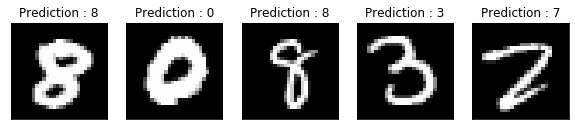

In [54]:
from matplotlib import pyplot
import random
fig , axes=pyplot.subplots(1,5,figsize=(10,10))
for i in range(5):
    index = random.randint(0,len(test_images)-1) 
    axes[i].set_title('Prediction : '+str(prediction[index]))
    axes[i].imshow(test_images[index])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
pyplot.show()

2